# 02 Toy Example

In [1]:
from staNMF import staNMF
from staNMF.nmf_models import spams_nmf, sklearn_nmf
import numpy as np
import matplotlib.pyplot as plt
from joblib import load
from staNMF.main import amariMaxError, findcorrelation

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.decomposition.nmf module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.decomposition. Anything that cannot be imported from sklearn.decomposition is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# load data
n_features = 10
n_samples = 200
n_components = 5
V = (
    np.random.uniform(0, 1, (n_components, n_features))
    * np.random.choice([0, 1], (n_components, n_features))
)
U = (
    np.random.uniform(0, 1, (n_samples, n_components))
    * np.random.choice([0, 1], (n_samples, n_components), p=[0.8,0.2])
)
X = U @ V + np.random.normal(0,1,(n_samples, n_features)) * 0.1

In [5]:
# define_model
model = staNMF(np.maximum(X,0),folderID="toy_example", K1=3, K2=7, parallel=True, replicates=20, seed=123)

In [6]:
# run NMF for different Ks
model.runNMF(sklearn_nmf(bootstrap=True))

Working on K = 3...
Working on K = 4...
Working on K = 5...
Working on K = 6...
Working on K = 7...


In [9]:
# compute the instability
model.instability("sklearn_nmf")

Calculating instability for 3
Calculating instability for 4
Calculating instability for 5
Calculating instability for 6
Calculating instability for 7


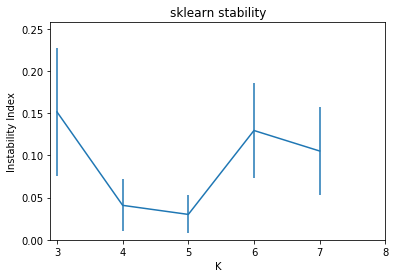

In [10]:
# visualize the instability result
model.plot(dataset_title="sklearn stability")

In [10]:
model.get_instability()

{3: 0.004465420744401025,
 4: 0.02604699946537865,
 5: 9.023845935994597e-05,
 6: 0.13755373402936658,
 7: 0.20228858949180814}

- Observation: the staNMF chooses the right number of components.

In [11]:
model = load("./staNMFDicts_toy_example/K=5/nmf_model_spams_nmf_4.joblib")

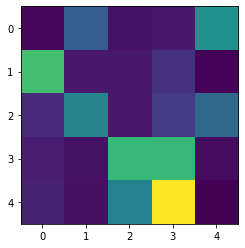

In [12]:
plt.imshow(model.components_ @ V.T)

## Try sklearn nmf

In [13]:
# define_model
model = staNMF(np.maximum(X,0),
               folderID="toy_example",
               K1=3, K2=7,
               parallel=True,
               replicates=50,
               seed=123)

In [14]:
# run NMF for different Ks
model.runNMF(sklearn_nmf(bootstrap=True))

Working on K = 3...
Working on K = 4...
Working on K = 5...
Working on K = 6...
Working on K = 7...


In [15]:
# compute the instability
model.instability("sklearn_nmf")

Calculating instability for 3
Calculating instability for 4
Calculating instability for 5
Calculating instability for 6
Calculating instability for 7


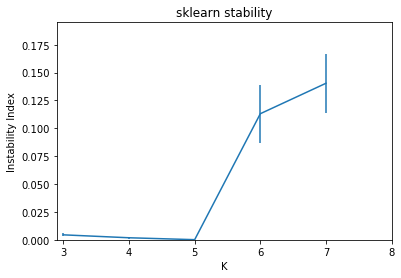

In [16]:
# visualize the instability result
model.plot(dataset_title="sklearn stability")

In [17]:
model.get_instability()

{3: 0.004448424877594663,
 4: 0.0018246975531600422,
 5: 0.00011599177786549556,
 6: 0.11312763344637743,
 7: 0.14043225315625715}

- Observation: the stability for patterns 3-5 is very good. For more patterns, it is less good.

In [25]:
model1 = load("./staNMFDicts_toy_example/K=3/nmf_model_sklearn_nmf_17.joblib")
model2 = load("./staNMFDicts_toy_example/K=3/nmf_model_sklearn_nmf_10.joblib")

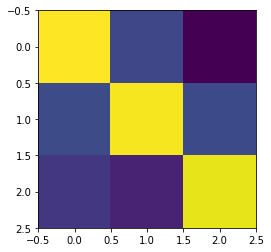

In [26]:
plt.imshow(findcorrelation(model1.components_.T, model2.components_.T))